In [145]:
%matplotlib inline
%load_ext autoreload
%autoreload

from quanty.model import backtester as q
from quanty.model import backtester_base as q_base
from quanty.model import db_manager as dm
from quanty.model import plotter as pltr
from quanty.model import setting
from quanty.model.portfolio import Port
from quanty.model.dual_momentum import DualMomentumSelector, DualMomentumPort

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.debugger import set_trace

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
db = dm.read_db(base='prices_global.pkl', add=['prices_global_gwx.pkl'])
db_kr = dm.read_db(base='prices_kr.pkl', add=['prices_global.pkl'])

# Multiasset model

In [150]:
multiasset = q.Backtester(
    setting.base_params(db), 
    w_type='inv_ranky2', 
    rebal_style='equal', 
    n_picks=10, 
    assets=setting.assets_multiasset, 
    sig_w_base=[1,0,0,0,0,0,1,0,0,0.25*4,0.25*6,0.25*12], #[1,0,0,0,0,0,1,0,0,1,2,3], 
    sig_w_dynamic=True, #False, 
    sig_dyn_fwd=21*np.array([1,2,3]), 
    #sig_dyn_m_backs=24, 
    follow_trend=None, #(20,60), 
    follow_trend_market=(20,60), 
    follow_trend_supporter=(60,250), 
    strong_condition=True, 
    market='BND_US_HY', #'ACWI', 
    supporter='BND_US_Long', 
    cash_equiv='BND_US_Tbill', 
    start='2007-12-31', 
    losscut=0.05, 
    profitake_sigma=3, 
    rentry_sigma=2, 
)


9.219600200653076


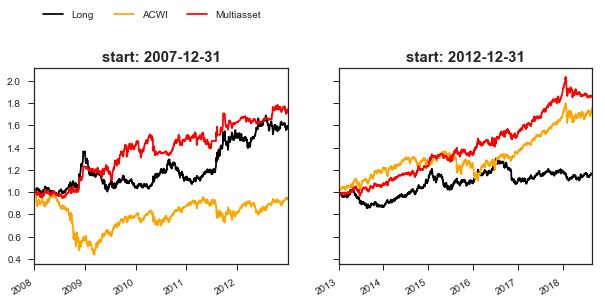

In [86]:
strats = ['BND_US_Long', 'ACWI', 'DualMomentum']
names = ['Long', 'ACWI', 'Multiasset']
color = ['k', 'orange', 'r']

multiasset.plot_cum_multi_periods(strats, names=names, color=color, logy=False, separator=['2012-12-31'])

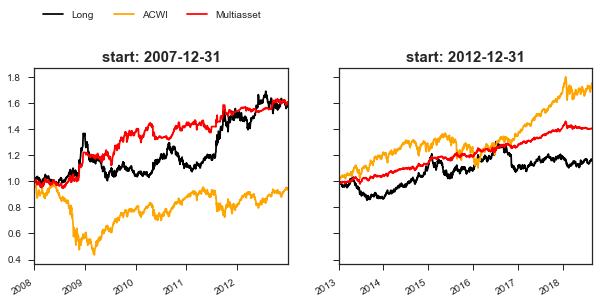

In [109]:
strats = ['BND_US_Long', 'ACWI', 'DualMomentum']
names = ['Long', 'ACWI', 'Multiasset']
color = ['k', 'orange', 'r']

multiasset.plot_cum_multi_periods(strats, names=names, color=color, logy=False, separator=['2012-12-31'])

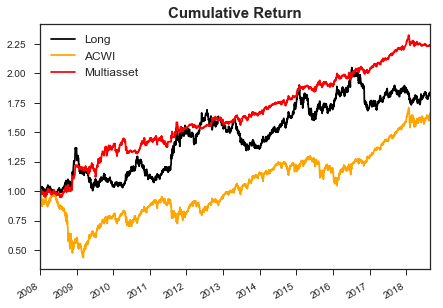

In [111]:
strats = ['BND_US_Long', 'ACWI', 'DualMomentum']
names = ['Long', 'ACWI', 'Multiasset']
color = ['k', 'orange', 'r']

multiasset.plot_cum(strats, names=names, color=color, logy=False)

In [112]:
rt = multiasset.cum.DualMomentum.resample('M').ffill().pct_change()
rt[rt<-0.05]

2010-05-31   -0.058
Freq: M, Name: DualMomentum, dtype: float64

In [99]:
multiasset.get_stats().tail()

,cum_last,n_samples,cagr,std,sharpe,mdd,cagr_roll_med,std_roll_med,sharpe_roll_med,beta,loss_proba,hit,profit_to_loss,consistency
BND_US_Pref,1.85,2688,5.87,21.27,0.28,-64.35,5.55,6.10,0.94,0.57,11.97,67.72,0.78,74.16
Frontier,0.70,2688,-3.32,15.50,-0.21,-68.46,4.05,12.65,0.33,0.22,41.33,51.18,0.92,-173.89
USD_DOWN,0.79,2688,-2.21,8.62,-0.26,-31.61,-1.32,8.42,-0.18,0.16,59.66,50.39,0.85,57.50
BND_US_Muni,1.46,2688,3.58,5.30,0.68,-12.33,3.61,3.79,0.88,0.01,17.43,62.99,1.05,93.25
DualMomentum,3.19,2688,11.38,12.42,0.92,-12.53,11.98,11.80,1.00,0.11,0.86,59.06,1.61,97.69


In [151]:
multiasset.get_stats().tail()

,cum_last,n_samples,cagr,std,sharpe,mdd,cagr_roll_med,std_roll_med,sharpe_roll_med,beta,loss_proba,hit,profit_to_loss,consistency
BND_US_Pref,1.85,2688,5.87,21.27,0.28,-64.35,5.55,6.10,0.94,0.57,11.97,67.72,0.78,74.16
Frontier,0.70,2688,-3.32,15.50,-0.21,-68.46,4.05,12.65,0.33,0.22,41.33,51.18,0.92,-173.89
USD_DOWN,0.79,2688,-2.21,8.62,-0.26,-31.61,-1.32,8.42,-0.18,0.16,59.66,50.39,0.85,57.50
BND_US_Muni,1.46,2688,3.58,5.30,0.68,-12.33,3.61,3.79,0.88,0.01,17.43,62.99,1.05,93.25
DualMomentum,2.27,2688,7.93,8.83,0.90,-9.15,7.37,6.12,1.11,0.06,0.25,59.84,1.64,93.22


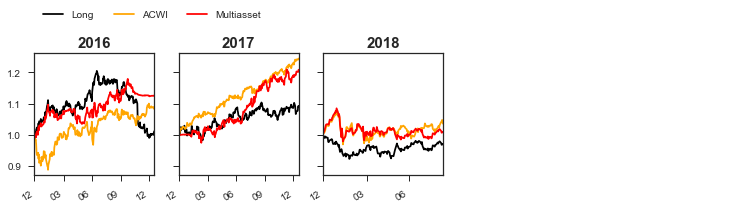

In [232]:
multiasset.plot_cum_yearly(strats, names=names, color=color, remove=range(2003,2016))

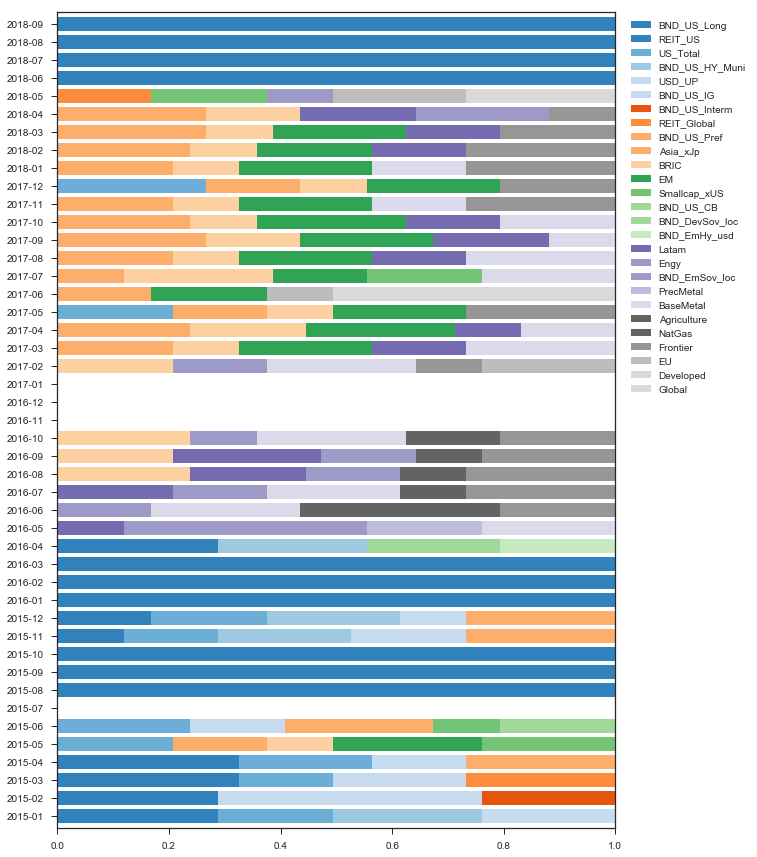

In [233]:
multiasset.plot_weight([2015, 2018])

# Global equity allocation model

In [159]:
geam = q.Backtester(
    setting.base_params(db), 
    w_type='inv_ranky2', 
    rebal_style='equal', 
    n_picks=10, 
    assets=setting.assets_global_eq, 
    sig_w_base=[1,0,0,0,0,0,1,0,0,0,0,0], 
    sig_w_dynamic=True, #False, 
    sig_dyn_fwd=21*np.array([1]), 
    #sig_dyn_m_backs=24, 
    follow_trend=(20,60), 
    follow_trend_market=(20,60), 
    follow_trend_supporter=(60,250), 
    strong_condition=True, 
    market='ACWI', 
    supporter='BND_US_Long', 
    cash_equiv='BND_US_Tbill', 
    start='2007-12-31', 
    losscut=0.05, 
    profitake_sigma=3, 
    rentry_sigma=2, 
)


8.923200130462646


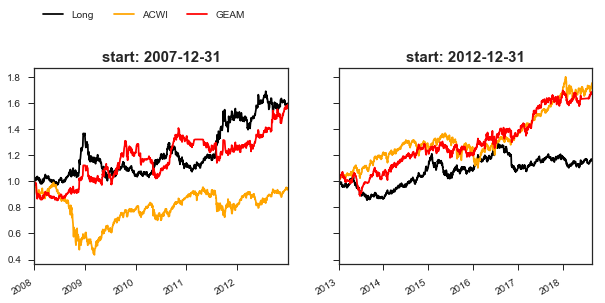

In [115]:
strats = ['BND_US_Long', 'ACWI', 'DualMomentum']
names = ['Long', 'ACWI', 'GEAM']
color = ['k', 'orange', 'r']

geam.plot_cum_multi_periods(strats, names=names, color=color, logy=False, separator=['2012-12-31'])

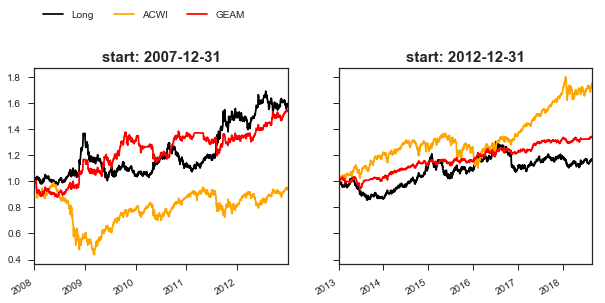

In [160]:
strats = ['BND_US_Long', 'ACWI', 'DualMomentum']
names = ['Long', 'ACWI', 'GEAM']
color = ['k', 'orange', 'r']

geam.plot_cum_multi_periods(strats, names=names, color=color, logy=False, separator=['2012-12-31'])

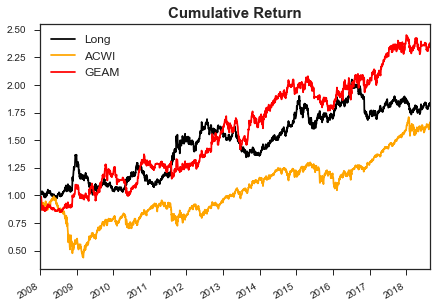

In [238]:
strats = ['BND_US_Long', 'ACWI', 'DualMomentum']
names = ['Long', 'ACWI', 'GEAM']
color = ['k', 'orange', 'r']

geam.plot_cum(strats, names=names, color=color, logy=False)

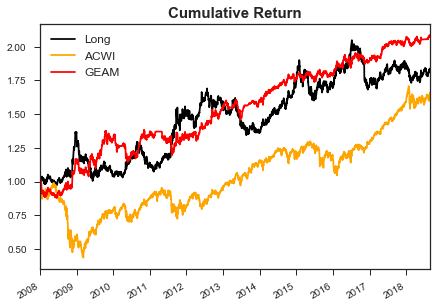

In [161]:
strats = ['BND_US_Long', 'ACWI', 'DualMomentum']
names = ['Long', 'ACWI', 'GEAM']
color = ['k', 'orange', 'r']

geam.plot_cum(strats, names=names, color=color, logy=False)

In [240]:
geam.stats.tail()

,cum_last,n_samples,cagr,std,sharpe,mdd,cagr_roll_med,std_roll_med,sharpe_roll_med,beta,loss_proba,hit,profit_to_loss,consistency
Brazil,0.56,2688,-5.25,38.60,-0.14,-77.25,-5.06,32.21,-0.17,1.42,55.80,48.82,1.07,24.92
Japan,1.28,2688,2.36,22.21,0.11,-49.67,6.71,18.18,0.37,0.86,32.68,58.27,0.87,-23.73
Netherland,1.35,2688,2.87,26.31,0.11,-63.49,8.62,19.67,0.43,1.13,30.79,59.06,0.85,-27.52
ACWI,1.64,2688,4.74,21.25,0.22,-56.41,11.25,15.57,0.74,1.00,25.26,60.63,0.88,23.23
DualMomentum,2.35,2688,8.29,15.29,0.54,-22.33,10.93,15.35,0.69,0.14,15.13,56.69,1.26,92.99


In [162]:
geam.get_stats().tail()

,cum_last,n_samples,cagr,std,sharpe,mdd,cagr_roll_med,std_roll_med,sharpe_roll_med,beta,loss_proba,hit,profit_to_loss,consistency
Canada,1.11,2688,0.95,23.87,0.04,-60.50,6.38,18.87,0.44,0.96,34.97,52.76,1.03,-18.00
Malaysia,1.25,2688,2.09,21.05,0.10,-52.12,5.62,17.12,0.32,0.71,35.34,54.33,1.01,23.17
Netherland,1.35,2688,2.87,26.31,0.11,-63.49,8.62,19.67,0.43,1.13,30.79,59.06,0.85,-27.52
Poland,1.02,2126,0.22,28.24,0.01,-52.81,2.84,24.28,0.12,1.35,47.10,48.00,1.22,3.55
DualMomentum,2.08,2688,7.03,11.13,0.63,-16.74,6.61,7.99,0.84,0.07,8.45,58.27,1.29,94.16


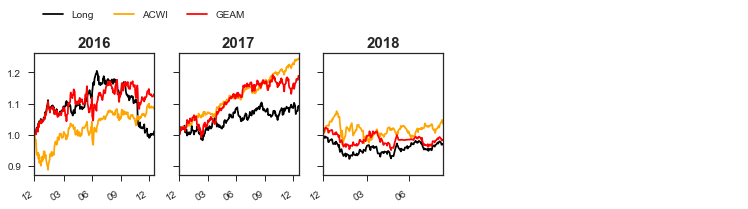

In [241]:
geam.plot_cum_yearly(strats, names=names, color=color, remove=range(2003,2016))

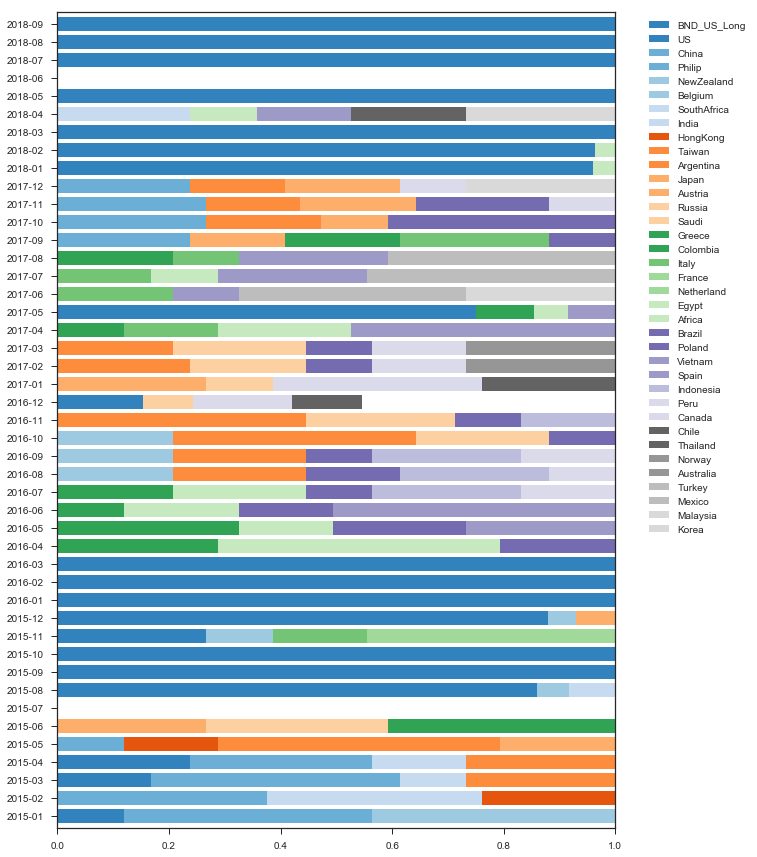

In [242]:
geam.plot_weight([2015, 2018])

# Global sector allocation model

In [201]:
gsam = q.Backtester(
    setting.base_params(db), 
    w_type='inv_ranky2', 
    rebal_style='equal', 
    n_picks=10, 
    assets=setting.assets_global_sector, 
    sig_w_base=[1,0,0,0,0,0,1,0,0,0,0,0], 
    sig_w_dynamic=True, #False, 
    sig_dyn_fwd=21*np.array([1]), 
    #sig_dyn_m_backs=24, 
    sig_dyn_thres=0.0, 
    follow_trend=(20,60), 
    follow_trend_market=(20,60), 
    follow_trend_supporter=(60,250), 
    strong_condition=True, 
    market='ACWI', 
    supporter='BND_US_Long', 
    cash_equiv='BND_US_Tbill', 
    start='2007-12-31', 
    losscut=0.05,
    profitake_sigma=3, 
    rentry_sigma=2, 
)


10.23360013961792


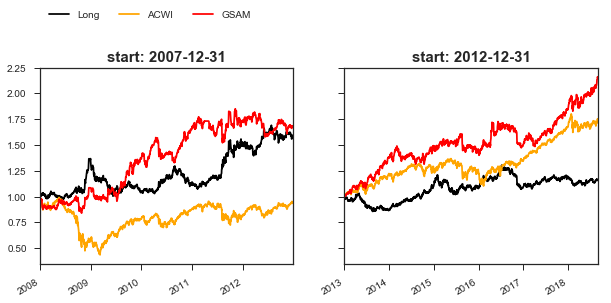

In [197]:
strats = ['BND_US_Long', 'ACWI', 'DualMomentum']
names = ['Long', 'ACWI', 'GSAM']
color = ['k', 'orange', 'r']

gsam.plot_cum_multi_periods(strats, names=names, color=color, logy=False, separator=['2012-12-31'])

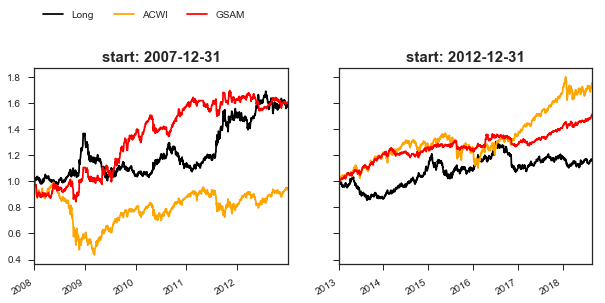

In [202]:
strats = ['BND_US_Long', 'ACWI', 'DualMomentum']
names = ['Long', 'ACWI', 'GSAM']
color = ['k', 'orange', 'r']

gsam.plot_cum_multi_periods(strats, names=names, color=color, logy=False, separator=['2012-12-31'])

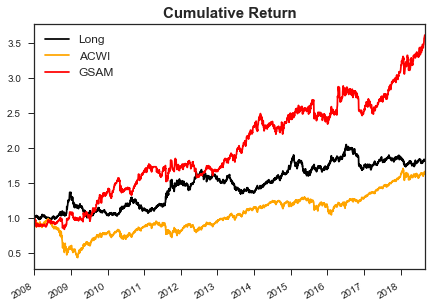

In [198]:
strats = ['BND_US_Long', 'ACWI', 'DualMomentum']
names = ['Long', 'ACWI', 'GSAM']
color = ['k', 'orange', 'r']

gsam.plot_cum(strats, names=names, color=color, logy=False)

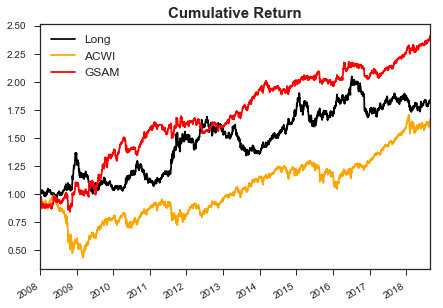

In [203]:
strats = ['BND_US_Long', 'ACWI', 'DualMomentum']
names = ['Long', 'ACWI', 'GSAM']
color = ['k', 'orange', 'r']

gsam.plot_cum(strats, names=names, color=color, logy=False)

In [200]:
gsam.get_stats().tail()

,cum_last,n_samples,cagr,std,sharpe,mdd,cagr_roll_med,std_roll_med,sharpe_roll_med,beta,loss_proba,hit,profit_to_loss,consistency
REIT_US_Mort,1.28,2688,2.30,25.25,0.09,-63.89,8.20,15.62,0.52,0.80,32.84,64.57,0.67,-59.00
Pharma,4.74,2688,15.59,20.16,0.77,-32.72,22.86,17.47,1.21,0.68,23.33,63.78,1.17,86.96
CommunityBank,3.01,2327,12.59,21.02,0.60,-34.72,10.62,19.61,0.56,0.91,15.45,61.47,1.15,91.24
Agribiz,1.33,2688,2.69,27.13,0.10,-69.53,6.32,16.38,0.42,1.08,29.77,59.06,0.86,-13.71
DualMomentum,3.61,2688,12.69,16.16,0.78,-16.47,11.89,14.64,0.74,0.30,12.87,61.42,1.23,93.77


In [204]:
gsam.get_stats().tail()

,cum_last,n_samples,cagr,std,sharpe,mdd,cagr_roll_med,std_roll_med,sharpe_roll_med,beta,loss_proba,hit,profit_to_loss,consistency
REIT_US_Mort,1.28,2688,2.30,25.25,0.09,-63.89,8.20,15.62,0.52,0.80,32.84,64.57,0.67,-59.00
Pharma,4.74,2688,15.59,20.16,0.77,-32.72,22.86,17.47,1.21,0.68,23.33,63.78,1.17,86.96
CommunityBank,3.01,2327,12.59,21.02,0.60,-34.72,10.62,19.61,0.56,0.91,15.45,61.47,1.15,91.24
Agribiz,1.33,2688,2.69,27.13,0.10,-69.53,6.32,16.38,0.42,1.08,29.77,59.06,0.86,-13.71
DualMomentum,2.42,2688,8.56,11.69,0.73,-16.89,8.36,7.83,0.80,0.19,10.74,61.42,1.23,86.85


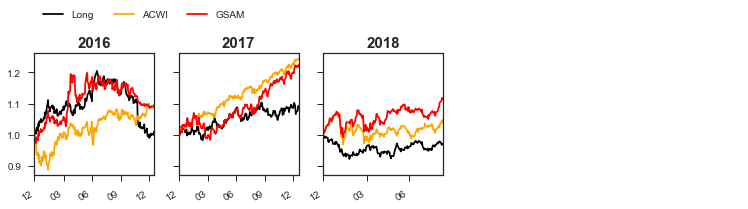

In [252]:
gsam.plot_cum_yearly(strats, names=names, color=color, remove=range(2003,2016))

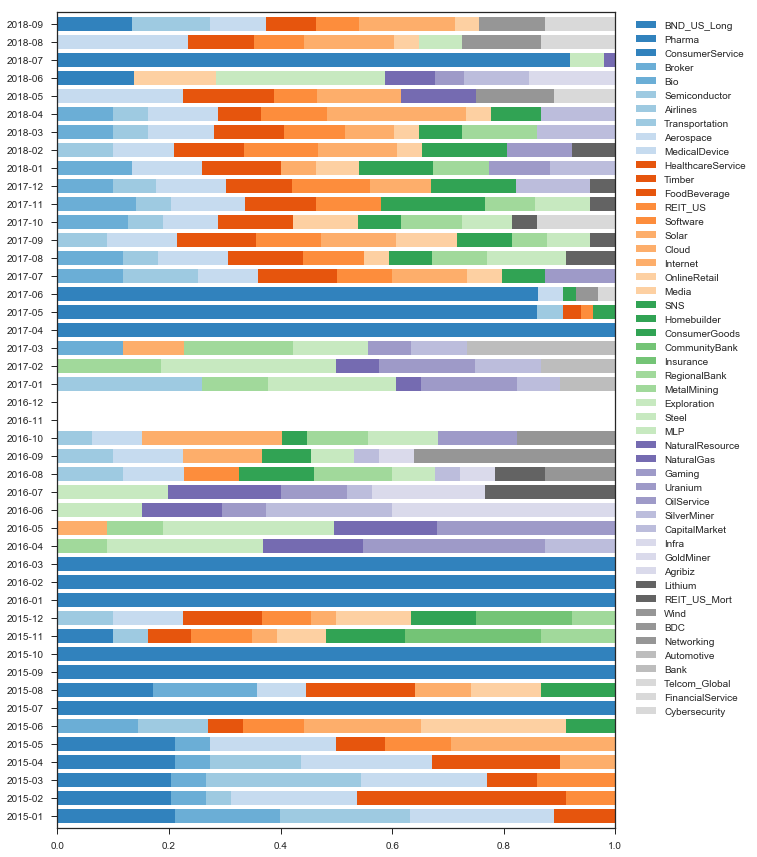

In [254]:
gsam.plot_weight([2015, 2018])

# Global fixed-income allocation model

In [285]:
%matplotlib inline
%load_ext autoreload
%autoreload

from quanty.model import backtester as q
from quanty.model import backtester_base as q_base
from quanty.model import db_manager as dm
from quanty.model import plotter as pltr
from quanty.model import setting
from quanty.model.portfolio import Port
from quanty.model.dual_momentum import DualMomentumSelector, DualMomentumPort

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.debugger import set_trace

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [318]:
gfam = q.Backtester(
    setting.base_params(db), 
    w_type='ranky2', 
    rebal_style='equal', 
    freq='1M', 
    n_picks=3, 
    assets=setting.assets_fi, 
    sig_w_base=[1,0,0,0,0,0,1,0,0,0.25*4,0.25*6,0.25*12], #[0,0,0,0,0,0,1,0,0,1,2,3], 
    sig_w_dynamic=False, 
    sig_dyn_fwd=21*np.array([1]), 
    #sig_dyn_thres=0.1, 
    #sig_dyn_m_backs=12, 
    follow_trend=(20,60), 
    follow_trend_market=(20,60), 
    follow_trend_supporter=(60,250), 
    strong_condition=True, 
    market='BND_US_AGG', #'BND_GlobalSov_loch', #'BND_US_AGG', 
    supporter='BND_US_Long', 
    cash_equiv='BND_US_Tbill', 
    start='2007-12-31', 
    losscut=1.0, 
    profitake_sigma=30,
    rentry_sigma=20, 
)


6.692357301712036


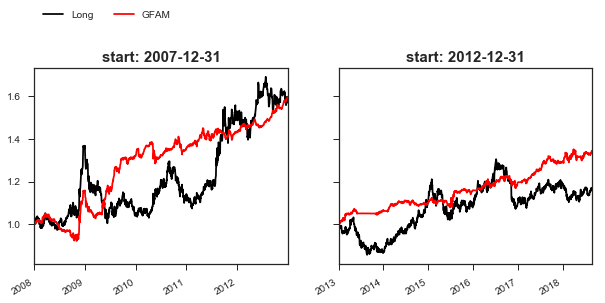

In [301]:
strats = ['BND_US_Long', 'DualMomentum']
names = ['Long', 'GFAM']
color = ['k', 'r']

gfam.plot_cum_multi_periods(strats, names=names, color=color, logy=False, separator=['2012-12-31'])

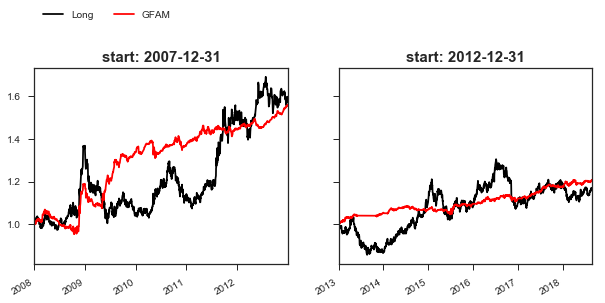

In [319]:
strats = ['BND_US_Long', 'DualMomentum']
names = ['Long', 'GFAM']
color = ['k', 'r']

gfam.plot_cum_multi_periods(strats, names=names, color=color, logy=False, separator=['2012-12-31'])

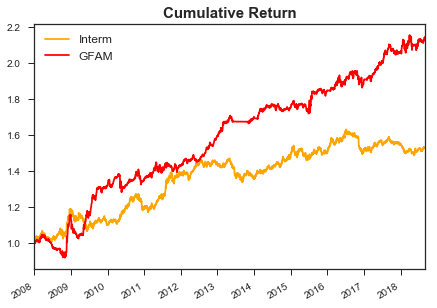

In [302]:
strats = ['BND_US_Interm', 'DualMomentum']
names = ['Interm', 'GFAM']
color = ['orange', 'r']

gfam.plot_cum(strats, names=names, color=color, logy=False)

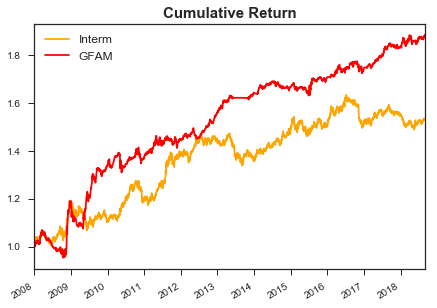

In [320]:
strats = ['BND_US_Interm', 'DualMomentum']
names = ['Interm', 'GFAM']
color = ['orange', 'r']

gfam.plot_cum(strats, names=names, color=color, logy=False)

In [303]:
gfam.get_stats().tail()

,cum_last,n_samples,cagr,std,sharpe,mdd,cagr_roll_med,std_roll_med,sharpe_roll_med,beta,loss_proba,hit,profit_to_loss,consistency
BND_EmSov_usd,1.75,2688,5.37,10.69,0.50,-34.70,7.22,7.20,1.01,0.14,23.99,66.14,0.84,88.45
BND_US_Pref,1.85,2688,5.87,21.27,0.28,-64.35,5.55,6.10,0.94,0.57,11.97,67.72,0.78,74.16
BND_US_Tbill,1.03,2688,0.30,0.57,0.53,-0.78,-0.02,0.26,-0.08,-0.00,56.99,52.76,2.26,-321.66
BND_US_Muni,1.46,2688,3.58,5.30,0.68,-12.33,3.61,3.79,0.88,0.01,17.43,62.99,1.05,93.25
DualMomentum,2.14,2688,7.35,6.51,1.13,-12.17,5.76,5.53,1.13,0.03,1.89,61.42,1.53,91.26


In [321]:
gfam.get_stats(start='2009-12-31').tail()

,cum_last,n_samples,cagr,std,sharpe,mdd,cagr_roll_med,std_roll_med,sharpe_roll_med,beta,loss_proba,hit,profit_to_loss,consistency
BND_EmSov_usd,1.56,2183,5.20,6.92,0.75,-14.48,6.61,6.80,0.94,0.19,23.89,65.05,0.96,83.02
BND_US_Pref,1.75,2183,6.64,7.61,0.87,-15.18,4.97,5.82,0.91,0.27,7.81,70.87,1.05,91.44
BND_US_Tbill,1.01,2183,0.16,0.26,0.63,-0.43,-0.04,0.25,-0.18,-0.00,66.08,49.51,1.88,-5.38
BND_US_Muni,1.35,2183,3.48,4.21,0.83,-9.74,2.81,3.26,0.83,-0.02,20.99,62.14,1.15,87.15
DualMomentum,1.41,2183,3.99,3.81,1.05,-5.93,3.79,3.33,1.10,0.07,5.12,63.11,1.48,94.90


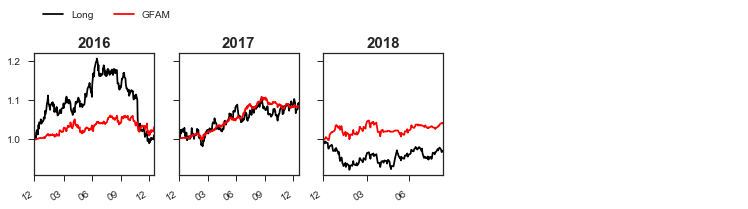

In [263]:
gfam.plot_cum_yearly(strats, names=names, color=color, remove=range(2003,2016))

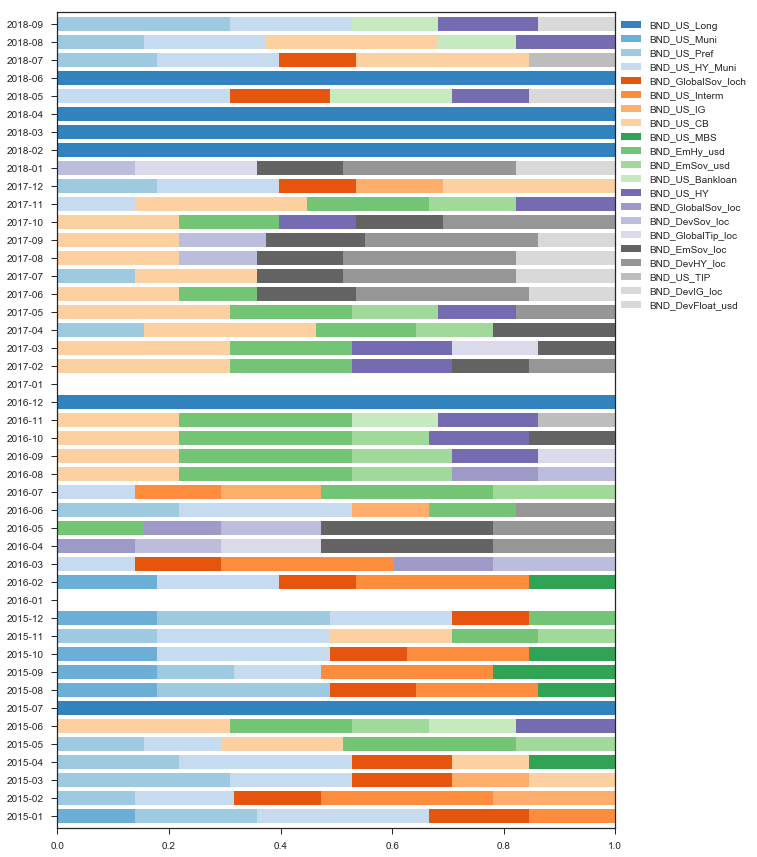

In [264]:
gfam.plot_weight([2015, 2018])

In [371]:
%matplotlib inline
%load_ext autoreload
%autoreload

from quanty.model import backtester as q
from quanty.model import db_manager as dm
from quanty.model import plotter as pltr
from quanty.model import setting
from quanty.model.portfolio import Port
from quanty.model.dual_momentum import DualMomentumSelector, DualMomentumPort

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.debugger import set_trace

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Korea factor allocation model
여기서부터 calibration 다시 시작

In [335]:
kfam = q.Backtester(
    setting.base_params(db_kr), 
    w_type='inv_ranky2', # ranky2 가 더 잘나오긴 한다. ----
    rebal_style='equal', 
    freq='1M', 
    n_picks=5, 
    assets=setting.assets_kr_factor, #|setting.assets_us_factor2, 
    sig_w_base=[1,0,0,0,0,0,1,0,0,1,2,3], 
    sig_w_dynamic=True, 
    sig_dyn_fwd=21*np.array([1,2,3]), 
    #sig_dyn_m_backs=12, 
    follow_trend=None, #(20,60), 
    follow_trend_market=(20,60), 
    follow_trend_supporter=(60,250), 
    strong_condition=True, 
    market='K200', 
    supporter='KTB10YL', 
    cash_equiv= 'KTB10Y', 
    #trade_assets=[('K200', {'K200L':0.5})], 
    start='2007-12-31', 
    losscut=0.05, 
    profitake_sigma=10, 
    rentry_sigma=2, 
)


5.834362745285034


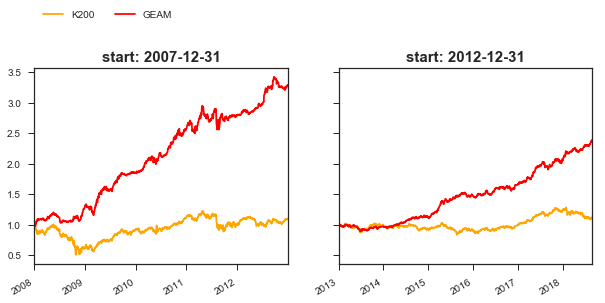

In [323]:
strats = ['K200', 'DualMomentum']
names = ['K200', 'GEAM']
color = ['orange', 'r']

kfam.plot_cum_multi_periods(strats, names=names, color=color, logy=False, separator=['2012-12-31'])

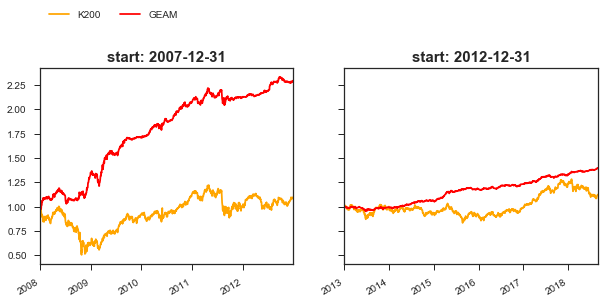

In [329]:
strats = ['K200', 'DualMomentum']
names = ['K200', 'GEAM']
color = ['orange', 'r']

kfam.plot_cum_multi_periods(strats, names=names, color=color, logy=False, separator=['2012-12-31'])

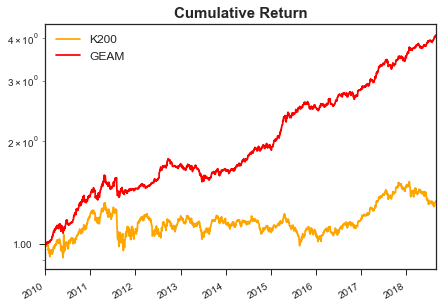

In [8]:
strats = ['K200', 'DualMomentum']
names = ['K200', 'GEAM']
color = ['orange', 'r']

kfam.plot_cum(strats, names=names, color=color, logy=True, start='2009-12-31')

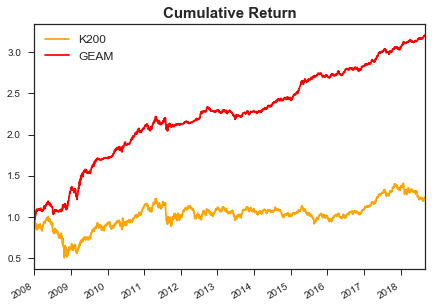

In [330]:
strats = ['K200', 'DualMomentum']
names = ['K200', 'GEAM']
color = ['orange', 'r']

kfam.plot_cum(strats, names=names, color=color, logy=False)

In [5]:
kfam.get_stats().tail()

,cum_last,n_samples,cagr,std,sharpe,mdd,cagr_roll_med,std_roll_med,sharpe_roll_med,beta,loss_proba,hit,profit_to_loss,consistency
HighDvd_kr,1.88,2767,5.87,15.26,0.38,-44.43,10.90,11.08,1.01,0.21,19.90,60.63,0.96,72.64
ACWI,1.64,2767,4.60,20.94,0.22,-56.41,11.04,15.39,0.73,1.00,24.82,60.63,0.88,23.18
K200,1.24,2767,1.93,20.75,0.09,-49.63,2.63,13.37,0.18,0.30,41.66,57.48,0.88,18.48
Contrarian_kr,1.57,2767,4.16,22.64,0.18,-60.07,7.16,15.11,0.53,0.31,32.17,59.06,0.92,60.01
DualMomentum,7.77,2767,20.36,11.04,1.84,-14.38,19.89,9.18,2.21,0.05,9.25,72.44,1.42,89.31


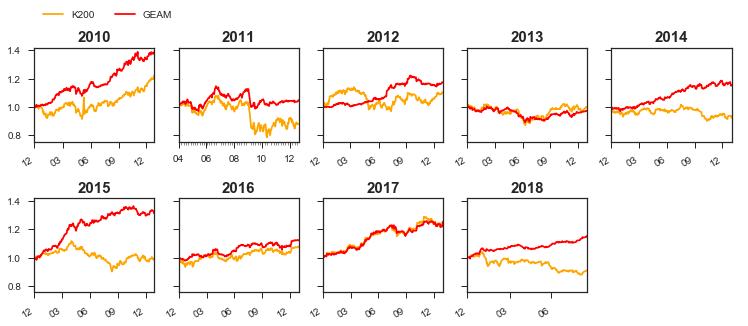

In [271]:
kfam.plot_cum_yearly(strats, names=names, color=color, remove=range(2003,2010))

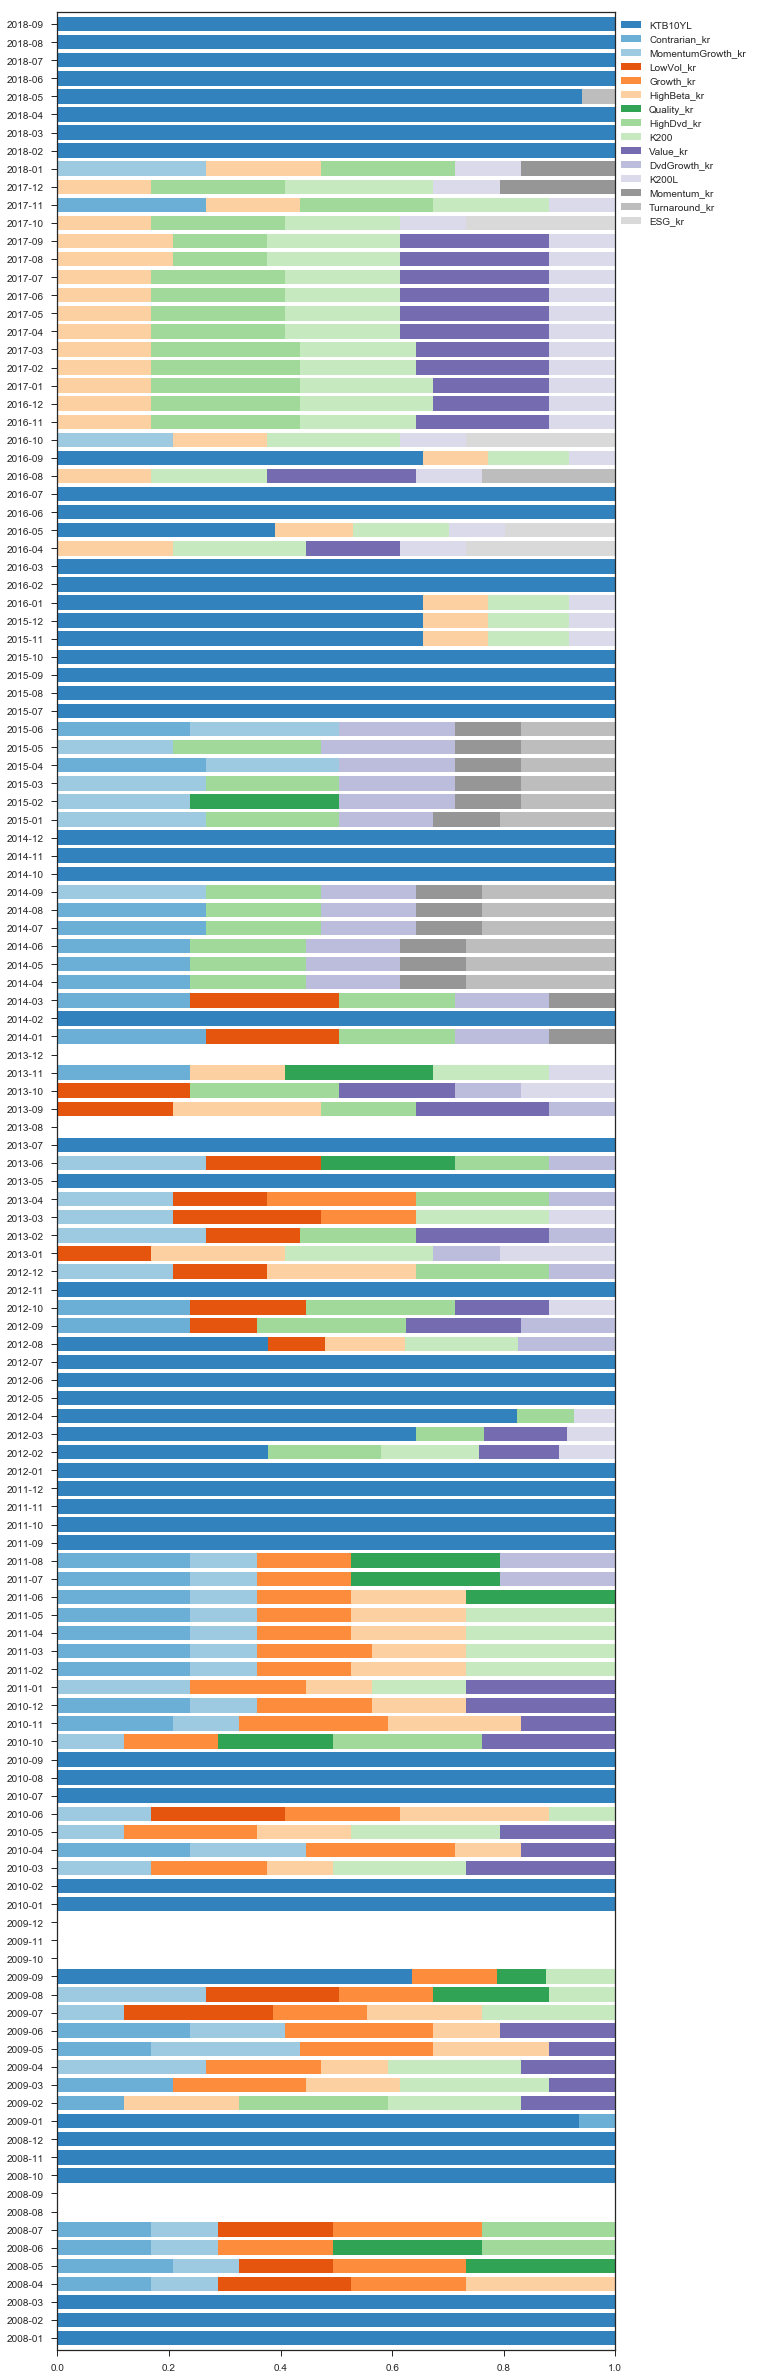

In [272]:
kfam.plot_weight([2003, 2018])

# Global factor 넣자!

In [350]:
%matplotlib inline
%load_ext autoreload
%autoreload

from quanty.model import backtester as q
from quanty.model import db_manager as dm
from quanty.model import plotter as pltr
from quanty.model import setting
from quanty.model.portfolio import Port
from quanty.model.dual_momentum import DualMomentumSelector, DualMomentumPort

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.debugger import set_trace

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [336]:
mix = q_base.BacktestComparator(setting.base_params(db), multiasset=multiasset, geam=geam, kfam=kfam, gsam=gsam, gfam=gfam)
mix.mix()

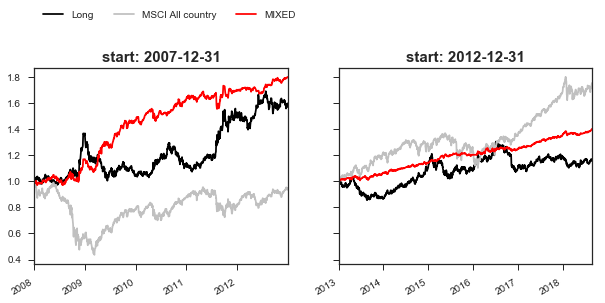

In [337]:
strats = ['BND_US_Long', 'ACWI', 'mixed']
names = ['Long', 'MSCI All country', 'MIXED']
color = ['k', 'silver', 'r']

mix.plot_cum_multi_periods(strats, names=names, color=color, logy=False, separator=['2012-12-31'])

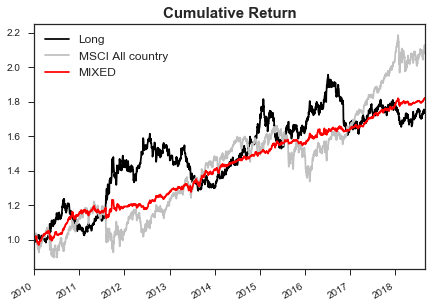

In [353]:
strats = ['BND_US_Long', 'ACWI', 'mixed']
names = ['Long', 'MSCI All country', 'MIXED']
color = ['k', 'silver', 'r']

mix.plot_cum(strats, names=names, color=color, logy=False, start='2009-12-31')

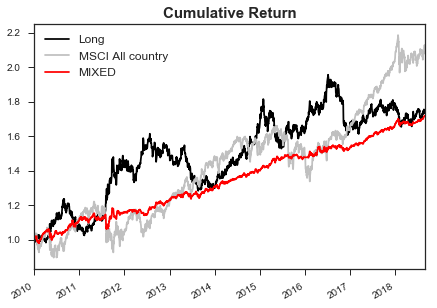

In [338]:
strats = ['BND_US_Long', 'ACWI', 'mixed']
names = ['Long', 'MSCI All country', 'MIXED']
color = ['k', 'silver', 'r']

mix.plot_cum(strats, names=names, color=color, logy=False, start='2009-12-31')

In [334]:
mix.get_stats(start='2009-12-31').tail()

,cum_last,n_samples,cagr,std,sharpe,mdd,cagr_roll_med,std_roll_med,sharpe_roll_med,beta,loss_proba,hit,profit_to_loss,consistency
geam,1.59,2183,5.45,9.02,0.60,-15.20,6.21,7.46,0.80,0.19,7.19,59.22,1.20,92.20
kfam,1.87,2183,7.46,4.44,1.68,-7.97,6.74,3.63,1.92,0.04,9.51,77.67,1.07,88.52
gsam,1.78,2183,6.83,8.45,0.81,-10.74,5.21,7.41,0.70,0.30,13.55,63.11,1.20,90.42
gfam,1.41,2183,3.99,3.81,1.05,-5.93,3.79,3.33,1.10,0.07,5.12,63.11,1.48,94.90
mixed,1.78,2183,6.80,5.32,1.28,-9.08,6.22,4.24,1.51,0.15,0.00,70.87,1.28,95.81


In [330]:
rt = mix.cum.mixed.resample('M').ffill().pct_change()#.plot.bar()
rt[rt<-0.05]

2009-01-31   -0.060275
Freq: M, Name: mixed, dtype: float64

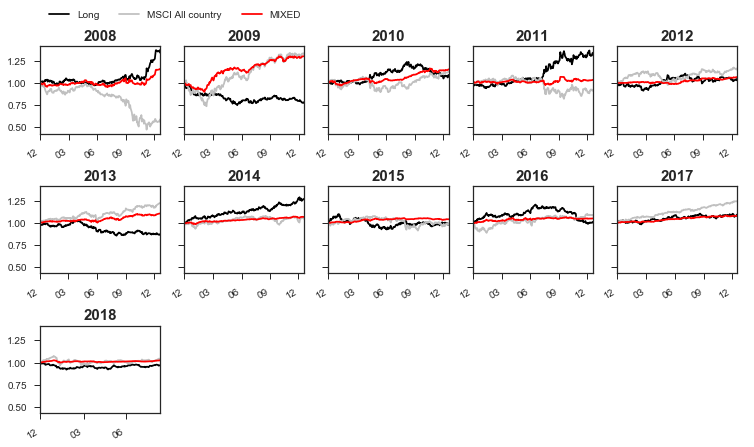

In [331]:
mix.plot_cum_yearly(strats, names=names, color=color)#, remove=range(2003,2013))